# Exploratory Data Analysis

## Import   

In [28]:
## Import
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Exploring data

### Read data from file

In [45]:
cleaned_data = pd.read_csv('./data/cleaned_data.csv')
cleaned_data

,company,company_size,job_title,level,domain,yoe_total,yoe_at_company,base,stock,bonus,total_compensation,location
0,Logitech,7250,Software Engineer,I4,Testing (SDET),10,5,190000.0,10000.0,0.0,200000.0,San Francisco Bay Area
1,Logitech,7250,Software Engineer,I2,ML / AI,4,3,126000.0,0.0,7000.0,133000.0,"Vancouver, WA"
2,Logitech,7250,Software Engineer,I3,Testing (SDET),11,11,120000.0,5000.0,12000.0,137000.0,"San Francisco, CA"
3,Logitech,7250,Software Engineer,I4,Production,8,8,100000.0,10000.0,0.0,110000.0,"Hsin-chu, TP, Taiwan"
4,Logitech,7250,Software Engineer,I1,ML / AI,2,0,123100.0,0.0,0.0,123100.0,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,Ubisoft,21620,Software Engineering Manager,L3,Video Game,13,13,80400.0,0.0,0.0,80400.0,"Bordeaux, AQ, France"
1246,Ubisoft,21620,Software Engineering Manager,L4,API Development (Back-End),10,1,115300.0,0.0,11500.0,126800.0,"Montreal, QC, Canada"
1247,Ubisoft,21620,Software Engineering Manager,L3,Other,12,12,73900.0,0.0,0.0,73900.0,"Paris, IL, France"
1248,Ubisoft,21620,Software Engineering Manager,L4,Full Stack,20,9,125000.0,0.0,5000.0,130000.0,"Montreal, QC, Canada"


In [46]:
cleaned_data.shape

(1250, 12)

In [47]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             1250 non-null   object 
 1   company_size        1250 non-null   int64  
 2   job_title           1250 non-null   object 
 3   level               1250 non-null   object 
 4   domain              1250 non-null   object 
 5   yoe_total           1250 non-null   int64  
 6   yoe_at_company      1250 non-null   int64  
 7   base                1250 non-null   float64
 8   stock               1250 non-null   float64
 9   bonus               1250 non-null   float64
 10  total_compensation  1250 non-null   float64
 11  location            1250 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 117.3+ KB


> **Observation:** 
> - The data has total 12 columns and 1250 rows
> - The data has no missing values
> - The total data size is higher than 1000 which means it a well collecting data
> - The type of the data is float64 and int64 which means it is a numerical data so we can easily apply some statistical methods to explore and analyze the data

### Numerical analysis using descriptive statistics

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)
- Variance and Standard deviation (std dev)
- Coefficient of Variation
- Skewness
- Kurtosis
- Standard Error (of the sample mean)
- Moments
- Covariance and Correlation

Due the scope of this lab, you just need to use basic function of Pandas to calculate basic descriptive statistics information and give insights from it.

In [32]:
def mean(df):
    return (df.mean()).round(1)

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

def mode(df):
    return df.mode().iloc[0]

num_col_info_df = num_col_info_df.agg([mode, mean, missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df


NameError: name 'num_col_info_df' is not defined

> **Observation**
> - Company size:
>   - The minimumm company size is 570 which means all of the data collected from large companies
>   - The maximum company size is 865,406 of Amazon which is the largest company in the world
>   - The average company size is 309,147 which means the data mostly is collected from BIG-TECH companies in the world
>   - The median company size is 147,000 which is much less than the average show that the top companies in the world have big difference in size compared to the orthers
>
> - Years of experience in total:
>   - The minimum years of experience is 0 which means there are some fresh graduated students can join in these large companies
>   - The maximum years of experience is 37 which means this career is not only for youngster but also for the elder
>   - The average years of experience is 11 which means the data mostly is collected from the people who have a lot of experience in this career and the experienced people are more likely to be hired by the top companies
>   - The median years of experience is 8 which is a little bit less than the average show that most of people in big companies have a lot of experience in this career
> 
> - Years of experience in current company:
>   - The minimum years of experience in current company is 0 which means there are some fresh graduated students can join in these large companies
>   - The maximum years of experience in current company is 28 which means there are some people who have been working for a long time in the same company
>   - The average years of experience in current company is 5 show that most of people in big companies stay there for a long time
>   - The median years of experience in current company is 2 which is much less than the average
> 
> - Base salary:
>   - The minimum
>   - The maximum base salary is 900,000 which is a huge number even though this data is collected from the top companies in the world
>   - The average base salary is 309,147 which is a huge number and it is not a surprise because the data is collected from the top companies in the world
>   - The median base salary is 157,000 which is much less than the average show that the top companies in the world have big difference in salary compared to the orthers
>   
> - Stock:
>   - The minimum is 0 which means there are some people who do not have stock or some companies do not offer stock to their employees
>   - The maximum stock is 750,000 which is near the maximum base salary show that some companies offer a huge amount of stock to their employees instead of huge base salary
>   - The average stock is 121,557 is so much less than the max base salary prove that the stock is not a huge part of the total compensation 
>   - The median stock is 0 which means most of companies do not offer stock to their employees
> 
> - Bonus:
>   - The minimum bonus is 0 which means there are some companies do not offer bonus to their employees so that not all big companies offer a good treat to their employees
>   - The maximum bonus is 275,000 which is nearly 4 months of maximum base salary
>   - The average bonus is 43,521 which is much less than the max base salary show that the bonus is not a huge part of the total compensation
>   - The median bonus is 0 which means most of companies do not offer bonus to their employees
> 
> - Total compensation:
>   - The minimum
>   - The maximum total compensation is 2,960,000 which is a super huge number compared to a business profit
>   - The average total compensation is 538,607 which is much less than the max total compensation show that the top companies in the world have big difference in total compensation compared to the orthers
>   -  The median total compensation is 150,000 which is surprisely much less than the average show that the top companies in the world have big difference in total compensation compared to the orthers

### Describe the correlation between features in the dataset

Let put the total compensation and base salary as the target variable and the others as the features to see the correlation between them

Now let's make a correlation matrix, then visualize it, and describe what insights you observed?

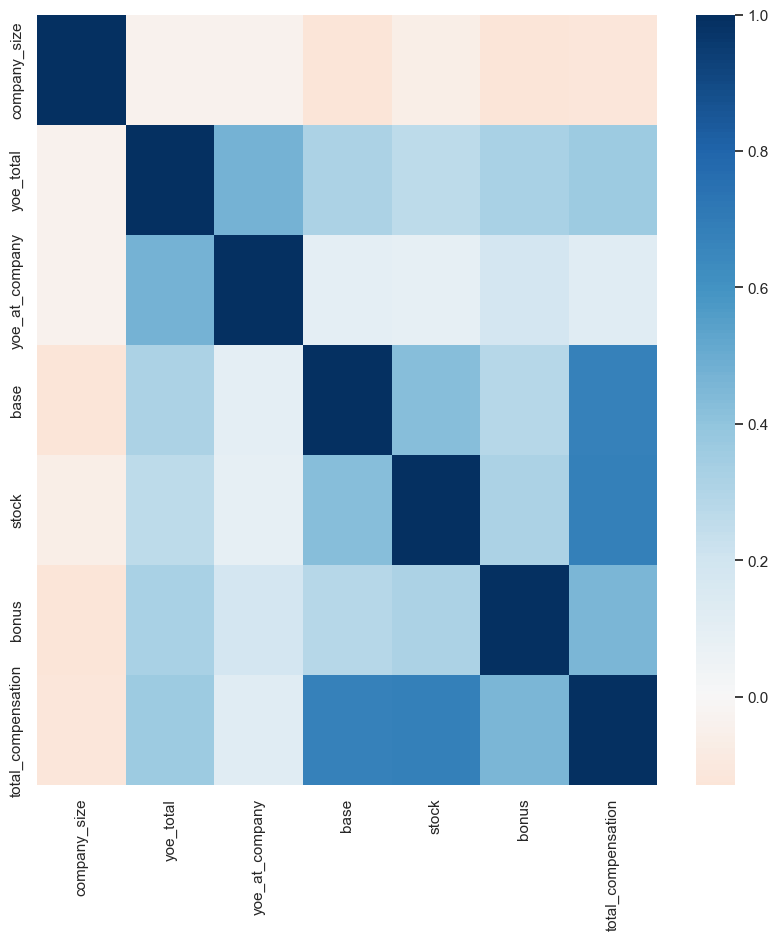

In [48]:
data_copy = cleaned_data.copy()

data_copy.drop(['company', 'job_title', 'level', 'domain', 'location'], inplace=True, axis='columns')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

> **Observation:**
> - The company size has a negative correlation with total compensation and base salary which means the bigger the company is, the less the total compensation and base salary are (especially the base salary)
> - The years of experience has a positive correlation with total compensation and base salary which means the more the years of experience is, the more the total compensation and base salary are (especially the total compensation)
> - The years of experience in current company has nearly no effect on total compensation and base salary

### Making question to analyze the data

**Question 1:** What is the average total compensation of the top 10 companies?

**Define:** The top 10 companies in the world are the companies which have the highest company size

In [49]:
# Get the top 10 companies
top_10_companies = pd.DataFrame()
top_10_companies["avg_compensation"] = cleaned_data.groupby(["company", "company_size"])["total_compensation"].mean()

top_10_companies = top_10_companies.groupby('company_size', group_keys=False).apply(lambda x: x.sort_values(by="company_size", ascending=False).head(10))
top_10_companies = top_10_companies.sort_index(level='company_size', ascending=False).head(10)

top_10_companies


,,avg_compensation
company,company_size,
Amazon,865406,216624.500000
Google,258750,282975.878261
Oracle,212570,184117.346939
Microsoft,182268,216230.630631
Apple,147000,474930.000000
Intel,112000,195967.391304
Facebook,94520,375015.570175
DXC Technology,86750,28000.000000
Grab,36080,133833.333333


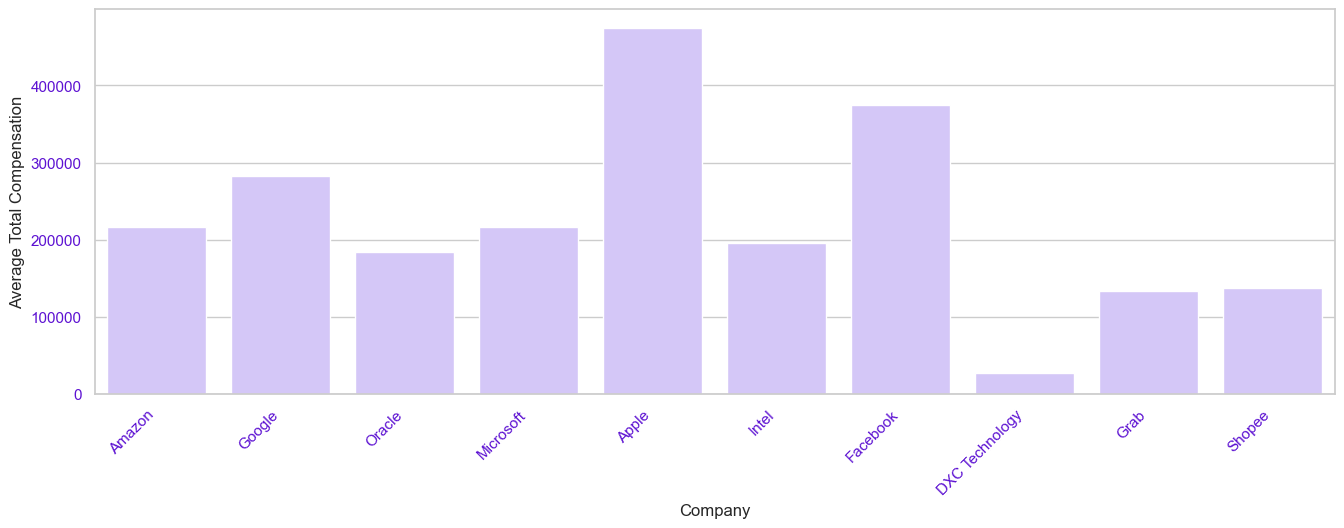

In [50]:
# Visualize the top 10 companies with highest average total compensation
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xticks(color='#5D12D2')
plt.yticks(color='#5D12D2')
plt.xlabel("Company")
plt.ylabel("Average Total Compensation")
sns.set(style="whitegrid")
ax = sns.barplot(data=top_10_companies, x="company", y= "avg_compensation", color='#D0BFFF')

> **Answer:**
> - Top 10 technology companies are: Amazon, Google, Oracle, Microsoft, Apple, Intel, Facebook, DXC Technology, Grab, Shopee
> - The highest average total compensation is 511,777 of Apple (the 5th company in the top 10) which is so much higher than the 2nd highest average total compensation is 341,259 of Facebook (the 7th company in the top 10). This proves that the big size company does not mean the high total compensation
> - The lowest average total compensation is 28,000 of DXC Technology (the 8th company in the top 10) which is not even a close gap to the 2nd lowest average total compensation is 133,833 of Grab (the 9th company in the top 10)

**Question 2:** How much effect does the years of experience have on the total compensation of top 10 average total compensation companies?

In [51]:
# Get the top 10 average total compensation companies
top_10_avg_compensation_companies = pd.DataFrame()
top_10_avg_compensation_companies["avg_compensation"] = cleaned_data.groupby("company")["total_compensation"].mean()
top_10_avg_compensation_companies = top_10_avg_compensation_companies.sort_values(by="avg_compensation", ascending=False).head(10)
top_10_avg_compensation_companies

,avg_compensation
company,
Roblox,536352.000000
Netflix,513768.292683
Apple,474930.000000
Snap,455178.723404
Facebook,375015.570175
Stripe,370986.220339
LinkedIn,330897.826087
Google,282975.878261
Axon,271077.777778


In [54]:
# Filter top 10 average total compensation companies data
top_10_avg_compensation_companies_data = cleaned_data[cleaned_data["company"].isin(top_10_avg_compensation_companies.index)]
top_10_avg_compensation_companies_data

,company,company_size,job_title,level,domain,yoe_total,yoe_at_company,base,stock,bonus,total_compensation,location
118,Netflix,14600,Software Engineer,L3,API Development (Back-End),0,0,215000.0,0.0,0.0,215000.0,"Los Gatos, CA"
119,Netflix,14600,Software Engineer,L5,Web Development (Front-End),15,2,515000.0,0.0,0.0,515000.0,"Los Angeles, CA"
120,Netflix,14600,Software Engineer,L5,Distributed Systems (Back-End),15,9,650000.0,0.0,0.0,650000.0,"Los Gatos, CA"
121,Netflix,14600,Software Engineer,L4,Data,2,0,285000.0,0.0,0.0,285000.0,"California City, CA"
122,Netflix,14600,Software Engineer,L2,"General, New Grad",0,0,205000.0,0.0,13000.0,218000.0,"Los Gatos, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Axon,1750,Software Engineering Manager,L8,Full Stack,5,2,179000.0,85000.0,18000.0,282000.0,"Seattle, WA"
1200,Axon,1750,Software Engineering Manager,L8,Data,8,2,130000.0,11000.0,13000.0,154000.0,"Scottsdale, AZ"
1201,Axon,1750,Software Engineering Manager,L8,Full Stack,10,3,150000.0,85000.0,15000.0,250000.0,"Seattle, WA"
1202,Axon,1750,Product Manager,L10,Product,15,3,250000.0,200000.0,0.0,450000.0,"Seattle, WA"


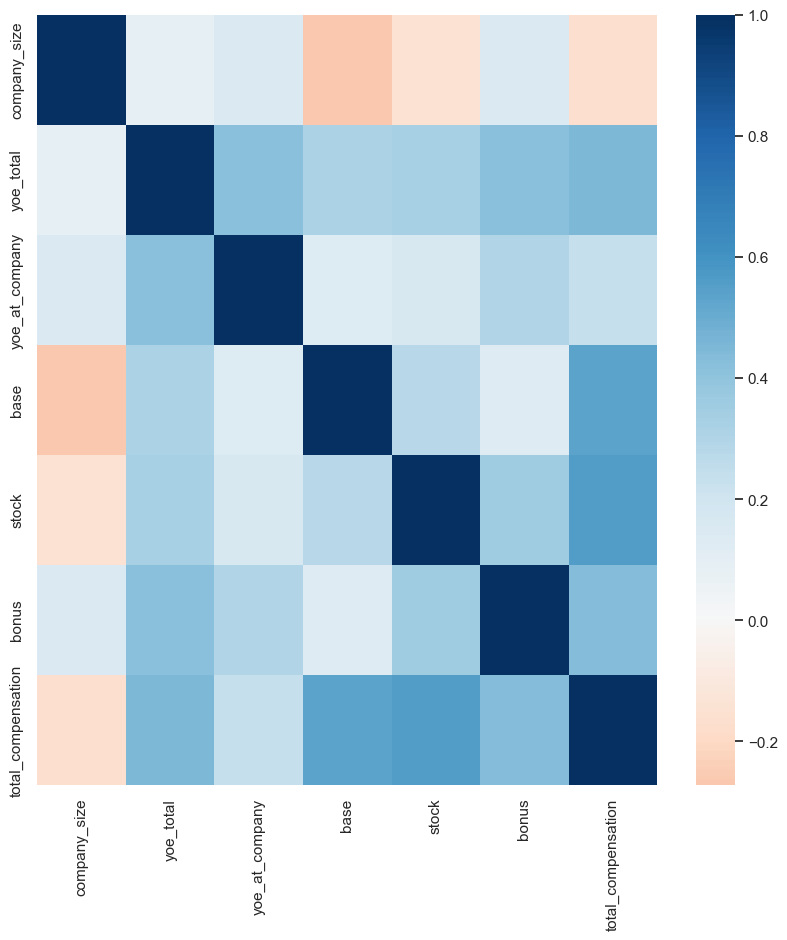

In [55]:
# Visualize the top 10 average total compensation companies
top_10_avg_compensation_companies_copy = top_10_avg_compensation_companies_data.copy()
top_10_avg_compensation_companies_copy.drop(['company', 'job_title', 'level', 'domain', 'location'], inplace=True, axis='columns')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top_10_avg_compensation_companies_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

> **Answer:** 
> - The top 10 average total compensation companies are: Roblox, Netflix, Apple, Snap, Facebook, Stripe, LinkedIn, Google, Axon, Riot Games
> - The years of experience has a big positive correlation with total compensation which means the more the years of experience is, the much more the total compensation are (especially the total compensation)

**Question 3:** What is top 10 job titles with the highest average total compensation?

In [59]:
# Get the top 10 job title with highest average total compensation
top_10_job_title = pd.DataFrame()
top_10_job_title["avg_compensation"] = cleaned_data.groupby("job_title")["total_compensation"].mean()
top_10_job_title = top_10_job_title.sort_values(by="avg_compensation", ascending=False).head(10)
top_10_job_title

,avg_compensation
job_title,
Software Engineering Manager,454029.885057
Product Manager,384572.600000
Data Science Manager,371641.666667
Security Engineer,282185.714286
Technical Program Manager,270367.500000
Applied Scientist,264585.714286
Hardware Engineer,245184.615385
Data Scientist,226367.153285
Software Engineer,223916.402116


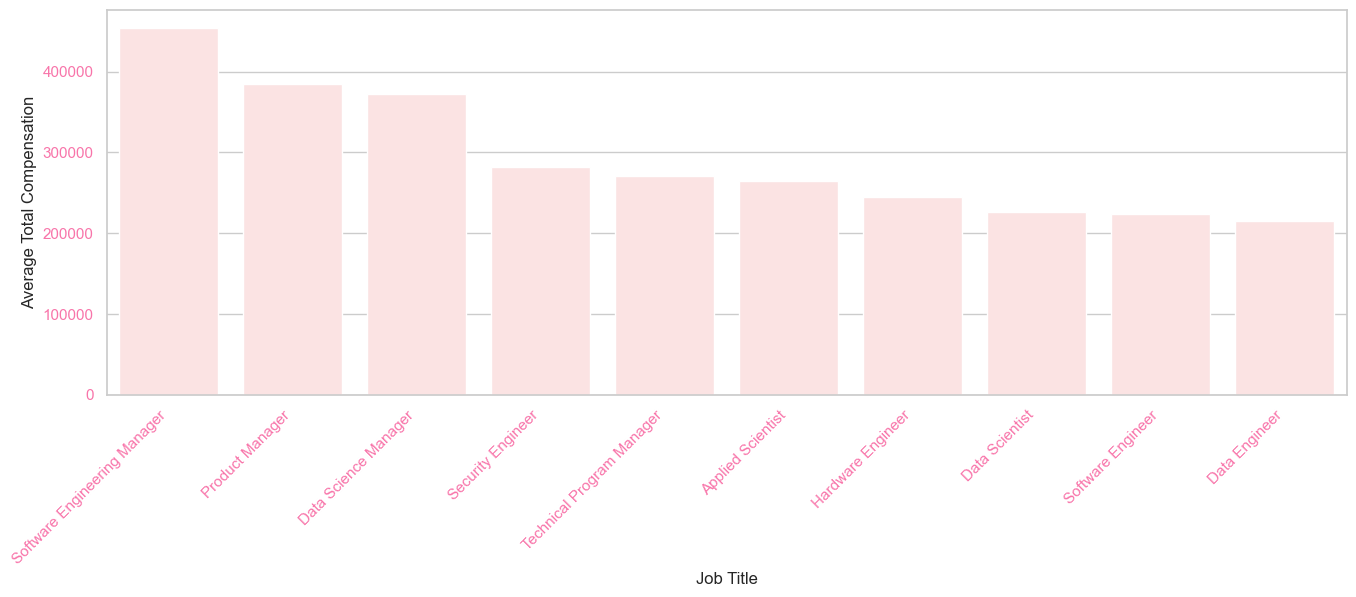

In [60]:
# Visualize the top 10 job title with highest average total compensation
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xticks(color='#F875AA')
plt.yticks(color='#F875AA')
plt.xlabel("Job Title")
plt.ylabel("Average Total Compensation")
sns.set(style="whitegrid")
ax = sns.barplot(data=top_10_job_title, x="job_title", y= "avg_compensation", color="#FFDFDF")

> **Answer:** 
> - The top 10 job titles with the highest average total compensation are: Software Engineer Manager, Product Manager, Data Science Manager, Security Engineer, Technical Program Manager, Applied Scientist, Hardware Engineer, Data Scientist, Software Engineer, Data Engineer
> - The highest average total compensation job title is Software Engineer Manager with nearly 500,000 average total compensation, and it has a big gap compared to the 2nd highest average total compensation job title is Product Manager with nearly 400,000 average total compensation
> - The lowest average total compensation job title is Data Engineer with above 200,000 average total compensation, and it has a nearly no gap compared to the 2nd lowest average total compensation job title is Software Engineer with also above 200,000 average total compensation
> - Overall, these job title has a big total compensation and has close gap compared to each other

**Question 4:** What is What is the average bonus of the top 10 companies?

**Define:** The top 10 companies in the world are the companies which have the highest company size

In [62]:
# Get the top 10 companies
top_10_companies_bonus = pd.DataFrame()
top_10_companies_bonus["avg_bonus"] = cleaned_data.groupby(["company", "company_size"])["bonus"].mean()

top_10_companies_bonus = top_10_companies_bonus.groupby('company_size', group_keys=False).apply(lambda x: x.sort_values(by="company_size", ascending=False).head(10))
top_10_companies_bonus = top_10_companies_bonus.sort_index(level='company_size', ascending=False).head(10)

top_10_companies_bonus


,,avg_bonus
company,company_size,
Amazon,865406,7846.739130
Google,258750,24634.782609
Oracle,212570,4570.408163
Microsoft,182268,21138.738739
Apple,147000,44100.000000
Intel,112000,19163.043478
Facebook,94520,26985.087719
DXC Technology,86750,242.857143
Grab,36080,11160.000000


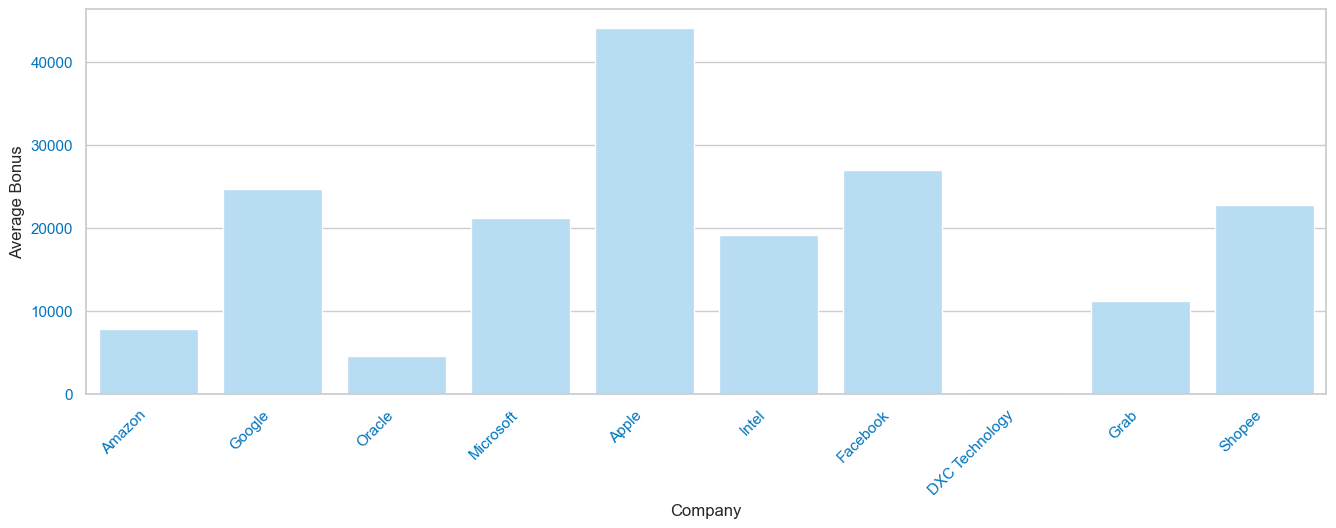

In [66]:
# Visualize the top 10 company with average bonus
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xticks(color='#0174BE')
plt.yticks(color='#0174BE')
plt.xlabel("Company")
plt.ylabel("Average Bonus")
sns.set(style="whitegrid")
ax = sns.barplot(data=top_10_companies_bonus, x="company", y= "avg_bonus", color="#AEDEFC")

> **Answer:**
> - Top 10 technology companies are: Amazon, Google, Oracle, Microsoft, Apple, Intel, Facebook, DXC Technology, Grab, Shopee
> - The highest bonus is 44,100 of Apple (the 5th company in the top 10) which is so much higher than the 2nd highest bonus is 26,985 of Facebook (the 7th company in the top 10). This proves that the big size company does not mean the high bonus and nice culture
> - The lowest bonus is 242 of DXC Technology (the 8th company in the top 10) which is a close gap to the 2nd lowest bonus is 4,570 of Oracle (the 3rd company in the top 10). This proves that the big size company does not mean the high bonus and nice culture
> - Overall, the bonus of the top 10 companies is not really high compared to total compensation and has quite large gap compared to each other

**Question 5:** What is the job title of top 10 average bonus?

In [64]:
# Get the top 10 job title with highest average bonus
top_10_job_title_bonus = pd.DataFrame()
top_10_job_title_bonus["avg_bonus"] = cleaned_data.groupby("job_title")["bonus"].mean()
top_10_job_title_bonus = top_10_job_title_bonus.sort_values(by="avg_bonus", ascending=False).head(10)
top_10_job_title_bonus

,avg_bonus
job_title,
Security Engineer,34400.000000
Software Engineering Manager,26211.494253
Data Science Manager,25412.500000
Technical Program Manager,22290.833333
Hardware Engineer,18869.230769
Product Manager,18775.200000
Solution Architect,18667.692308
Program Manager,15237.142857
Technical Writer,15218.518519


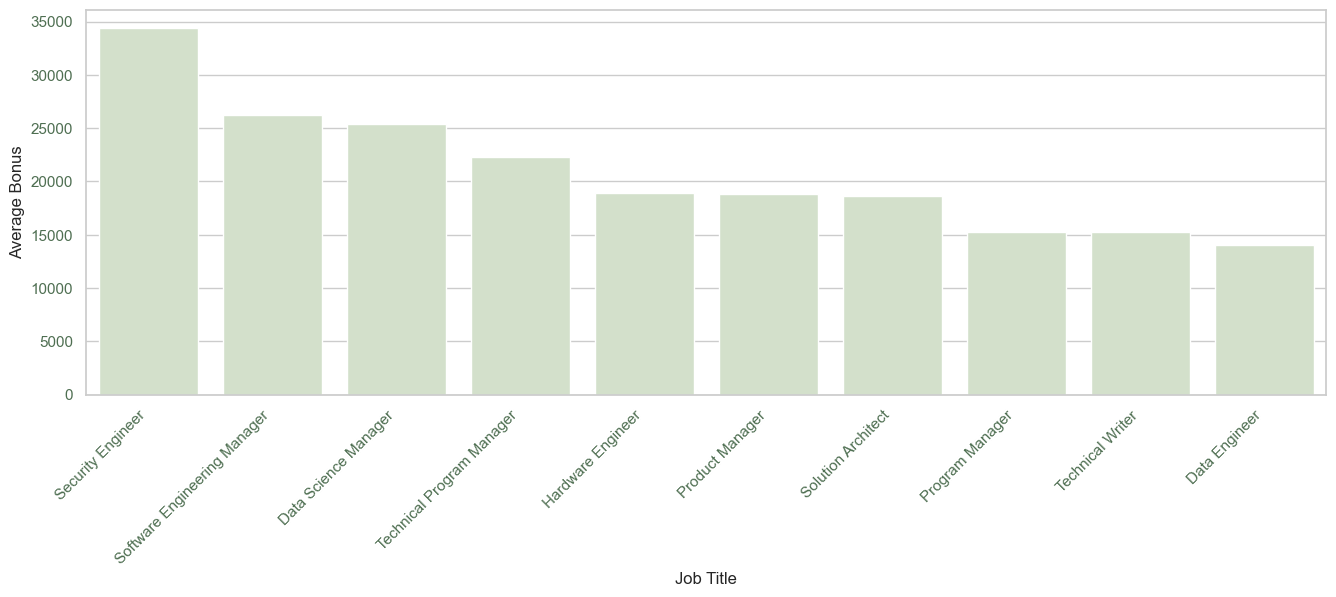

In [65]:
# Visualize the top 10 job title with highest average total compensation
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xticks(color='#4F6F52')
plt.yticks(color='#4F6F52')
plt.xlabel("Job Title")
plt.ylabel("Average Bonus")
sns.set(style="whitegrid")
ax = sns.barplot(data=top_10_job_title_bonus, x="job_title", y= "avg_bonus", color="#D2E3C8")

> **Answer:**
> - The top 10 job titles with highest average bonus are: Security Engineer, Data Science Manager, Software Engineering Manager, Technical Program Manager, Solution Architect, Hardware Engineer, Product Manager, Technical Writer, Program Manager, Data Engineer
> - The highest average bonus job title is Security Engineer with 34,400 average bonus, and it has nearly no gap compared to the 2nd highest average bonus job title is Data Science Manager with 26,211 average bonus. Looking at the top 3 highest, we can see that they are close to each other
> - The lowest average bonus job title is Data Engineer with 14,000 average bonus, and it has nearly no gap compared to the 2nd lowest average bonus job title is Program Manager with 15,218 average bonus. Looking at the top 3 lowest, we can see that they are close to each other. However, the lowest average still has a big gap compared to the highest average bonus
> Overall, the bonus of the top 10 job titles is not really high compared to total compensation and has quite small gap compared to each other

**Question 6:** What is What is the average base salary of the top 10 companies?

**Define:** The top 10 companies in the world are the companies which have the highest company size

In [67]:
# Get the top 10 companies
top_10_companies_salary = pd.DataFrame()
top_10_companies_salary["avg_salary"] = cleaned_data.groupby(["company", "company_size"])["base"].mean()

top_10_companies_salary = top_10_companies_salary.groupby('company_size', group_keys=False).apply(lambda x: x.sort_values(by="company_size", ascending=False).head(10))
top_10_companies_salary = top_10_companies_salary.sort_index(level='company_size', ascending=False).head(10)

top_10_companies_salary

,,avg_salary
company,company_size,
Amazon,865406,144133.695652
Google,258750,161146.086957
Oracle,212570,122382.653061
Microsoft,182268,152383.783784
Apple,147000,235900.000000
Intel,112000,146757.608696
Facebook,94520,186576.315789
DXC Technology,86750,27757.142857
Grab,36080,99362.222222


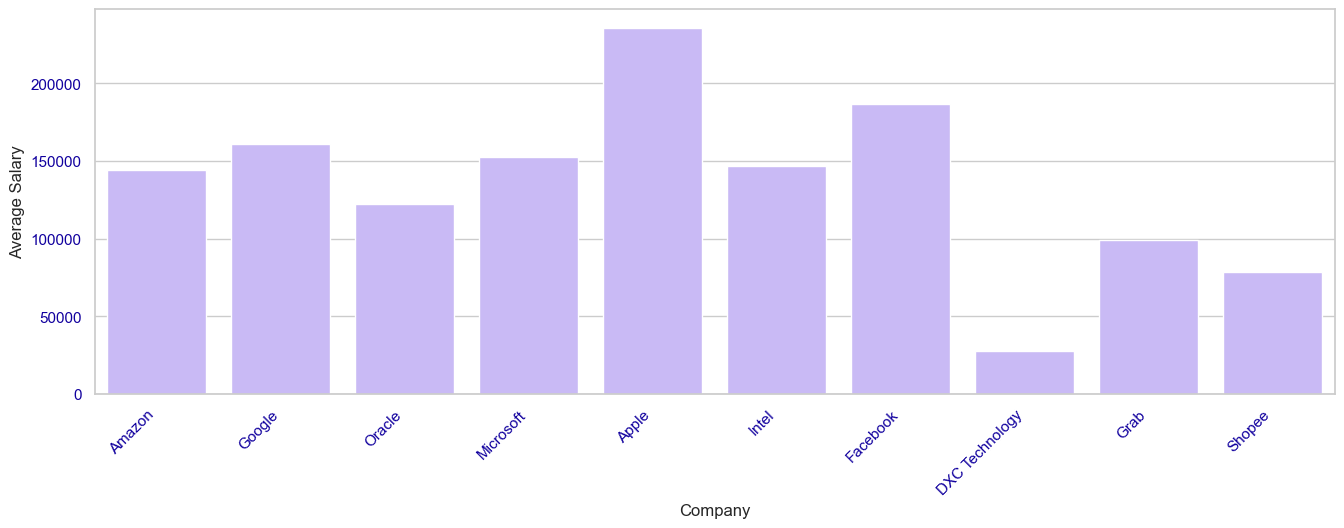

In [72]:
# Visualize the top 10 company with average salary
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xticks(color='#11009E')
plt.yticks(color='#11009E')
plt.xlabel("Company")
plt.ylabel("Average Salary")
sns.set(style="whitegrid")
ax = sns.barplot(data=top_10_companies_salary, x="company", y= "avg_salary", color="#C4B0FF")

**Question 8:** What is What is the average stock of the top 10 companies?

**Define:** The top 10 companies in the world are the companies which have the highest company size

In [70]:
# Get the top 10 companies
top_10_companies_stock = pd.DataFrame()
top_10_companies_stock["avg_stock"] = cleaned_data.groupby(["company", "company_size"])["stock"].mean()

top_10_companies_stock = top_10_companies_stock.groupby('company_size', group_keys=False).apply(lambda x: x.sort_values(by="company_size", ascending=False).head(10))
top_10_companies_stock = top_10_companies_stock.sort_index(level='company_size', ascending=False).head(10)

top_10_companies_stock

,,avg_stock
company,company_size,
Amazon,865406,64567.934783
Google,258750,77662.608696
Oracle,212570,57164.285714
Microsoft,182268,42708.108108
Apple,147000,194930.000000
Intel,112000,30046.739130
Facebook,94520,111457.982456
DXC Technology,86750,0.000000
Grab,36080,23311.111111


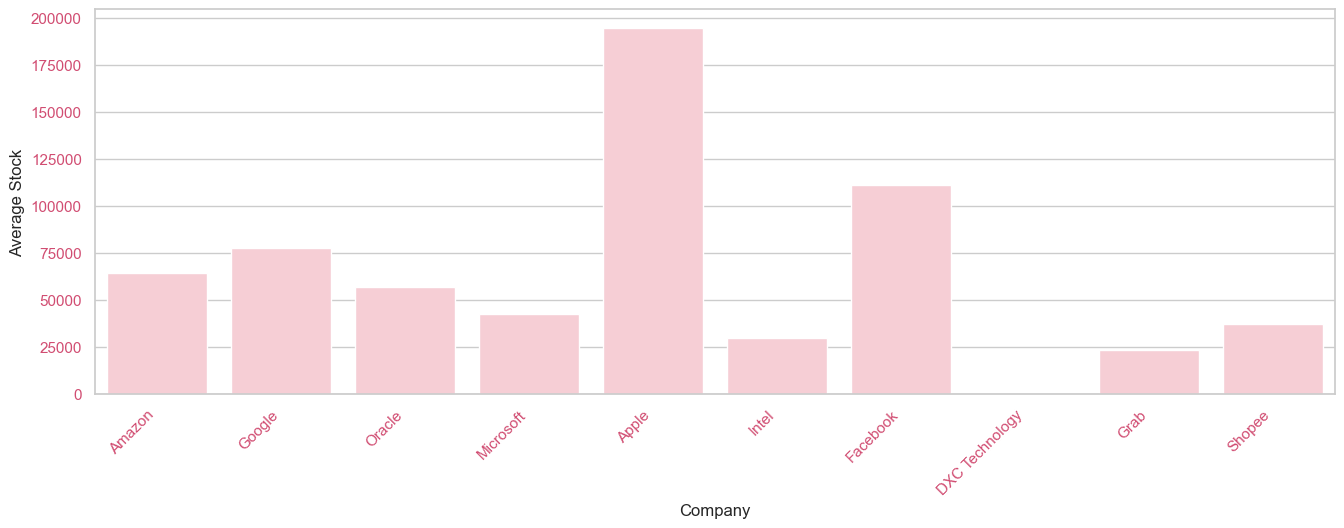

In [73]:
# Visualize the top 10 company with average stock
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xticks(color='#D14D72')
plt.yticks(color='#D14D72')
plt.xlabel("Company")
plt.ylabel("Average Stock")
sns.set(style="whitegrid")
ax = sns.barplot(data=top_10_companies_stock, x="company", y= "avg_stock", color="#FCC8D1")